# Loan Approval Prediction, Model Development, Demo

In [6]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn
import pickle
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix,roc_auc_score,roc_curve


In [7]:
# import data as pandas datarame
train_df = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")
# combined_df = pd.concat([train_df,test_df], ignore_index=True)

print(f"Data shape for train data = {train_df.shape}")
# print(f"Data shape for test data = {test_df.shape}")
# print(f"Data shape for appended dataset = {combined_df.shape}")

df = train_df.copy()

## for this demo, as the data are small, we append the data together particularly for data exploration

Data shape for train data = (614, 13)


## Basic data checks

In [8]:
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
print(f"Data shape = {df.shape}")
print(f"Column header name = {df.columns}")


Data shape = (614, 13)
Column header name = Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [10]:
# Check data types for each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
print(f"Identify if there is any duplication in loan ID = {"No duplication" if df['Loan_ID'].nunique() == 614 else "Possible duplication"}")
print(f"Unique values for Gender = {df['Gender'].unique()}")
print(f"Unique values for Married column = {df["Married"].unique()}")
print(f"List of values in Dependents column = {df["Dependents"].unique()}")
print(f"List of values in Education column = {df["Education"].unique()}")
print(f"List of values in Self-Employed column = {df["Self_Employed"].unique()}")
print(f"Range of Application Income, max = {df['ApplicantIncome'].max()}, min = {df["ApplicantIncome"].min()}")
print(f"Range of Co application Income, max = {df['CoapplicantIncome'].max()}, min = {df["CoapplicantIncome"].min()}")
print(f"Range of LoanAmount, max = {df["LoanAmount"].max()}, min = {df["LoanAmount"].min()}")
print(f"List of values on loan amount term = {df["Loan_Amount_Term"].unique()}")
print(f"List of values in Credit_History = {df["Credit_History"].unique()}")
print(f"List of values in Property_Area = {df["Property_Area"].unique()}")
print(f"List of values in Loan Status = {df["Loan_Status"].unique()}")


Identify if there is any duplication in loan ID = No duplication
Unique values for Gender = ['Male' 'Female' nan]
Unique values for Married column = ['No' 'Yes' nan]
List of values in Dependents column = ['0' '1' '2' '3+' nan]
List of values in Education column = ['Graduate' 'Not Graduate']
List of values in Self-Employed column = ['No' 'Yes' nan]
Range of Application Income, max = 81000, min = 150
Range of Co application Income, max = 41667.0, min = 0.0
Range of LoanAmount, max = 700.0, min = 9.0
List of values on loan amount term = [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
List of values in Credit_History = [ 1.  0. nan]
List of values in Property_Area = ['Urban' 'Rural' 'Semiurban']
List of values in Loan Status = ['Y' 'N']


In [7]:
# Check basic statistics 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [8]:
missing_df = pd.DataFrame({'Items': df.columns,'Missing Values Count': df.isnull().sum().values, 'Missing Values Pct': df.isnull().sum().values/len(df)*100})
missing_df.head(15)

,Items,Missing Values Count,Missing Values Pct
0,Loan_ID,0,0.000000
1,Gender,13,2.117264
2,Married,3,0.488599
3,Dependents,15,2.442997
4,Education,0,0.000000
5,Self_Employed,32,5.211726
6,ApplicantIncome,0,0.000000
7,CoapplicantIncome,0,0.000000
8,LoanAmount,22,3.583062
9,Loan_Amount_Term,14,2.280130


In [9]:
# As the percentage of missing data is quite small, we will impute the missing data which may not greatly affect our data exploration
# This data preprocessing should be included within the deploymnt pipeline

# Gender
mode_gender = df['Gender'].mode()[0]
df['Gender'].fillna(mode_gender, inplace=True)

# Marrief
mode_married = df['Married'].mode()[0]
df['Married'].fillna(mode_married, inplace=True)

# Dependents
mode_dependents = df['Dependents'].mode()[0]
df['Dependents'].fillna(mode_dependents, inplace=True)

# Self employed
mode_selfEmployed = df['Self_Employed'].mode()[0]
df['Self_Employed'].fillna(mode_selfEmployed, inplace=True)

# Loan amount
median_loanAmount = df['LoanAmount'].median()
df['LoanAmount'].fillna(median_loanAmount, inplace=True)

# Loan amount term
median_loanAmountTerm = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'].fillna(median_loanAmountTerm, inplace=True)

# Credit history
mode_creditHistory = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(mode_creditHistory, inplace=True)


## Data exploration

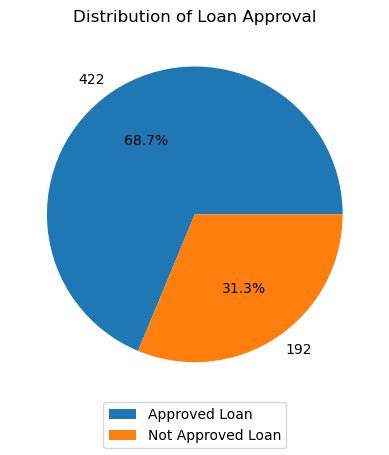

In [10]:
# Check the target value, evaluate data imbalance or not
loan_status_val_counts = df['Loan_Status'].value_counts()
plt.pie(loan_status_val_counts, labels=loan_status_val_counts, autopct="%1.1f%%")
plt.title("Distribution of Loan Approval")
plt.figlegend(['Approved Loan','Not Approved Loan'], loc='lower center')

# plt.bar(loan_status_val_counts.index, loan_status_val_counts.values)
# plt.xlabel('Categories')
# plt.ylabel('Counts')
# plt.title("Count of Loan Status")
# plt.show()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

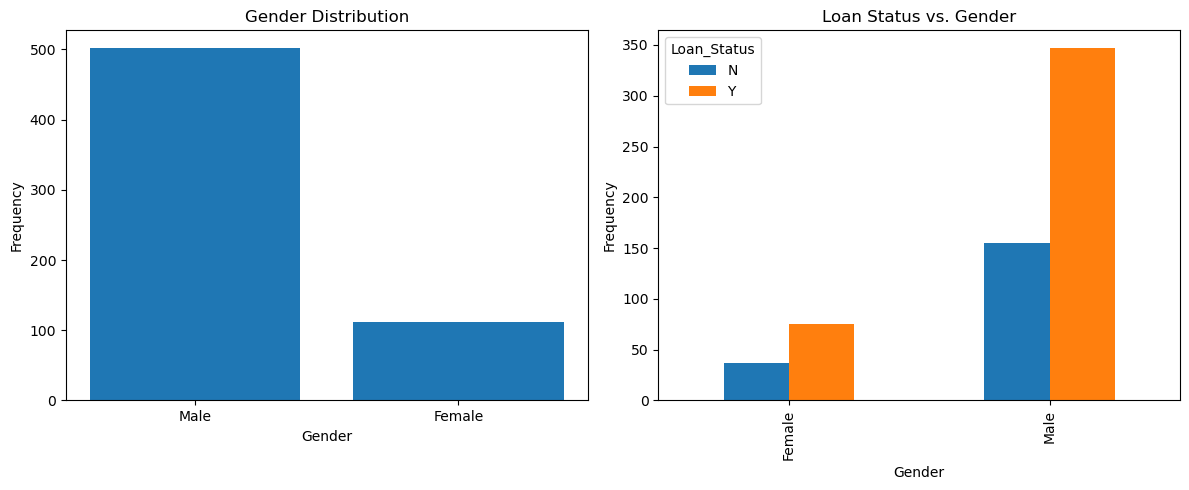

In [11]:
# Loan status vs. Gender
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
axs[0].set_title("Gender Distribution")
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Frequency")

pd.crosstab(df['Gender'], df['Loan_Status']).plot(kind='bar',ax=axs[1])
axs[1].set_title("Loan Status vs. Gender")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
gender_approval = pd.crosstab(df['Gender'], df['Loan_Status'])
male_approval_rate = round(gender_approval.iloc[1:2,1].values[0]/((gender_approval.iloc[1:2,1].values[0]) + (gender_approval.iloc[1:2,0].values[0]))*100,2)
print(f"male loan approval rate = {male_approval_rate}")
female_approval_rate = round(gender_approval.iloc[0:1,1].values[0]/((gender_approval.iloc[0:1,1].values[0]) + (gender_approval.iloc[0:1,0].values[0]))*100,2)
print(f"Female loan approval rate = {female_approval_rate}")

male loan approval rate = 69.12
Female loan approval rate = 66.96


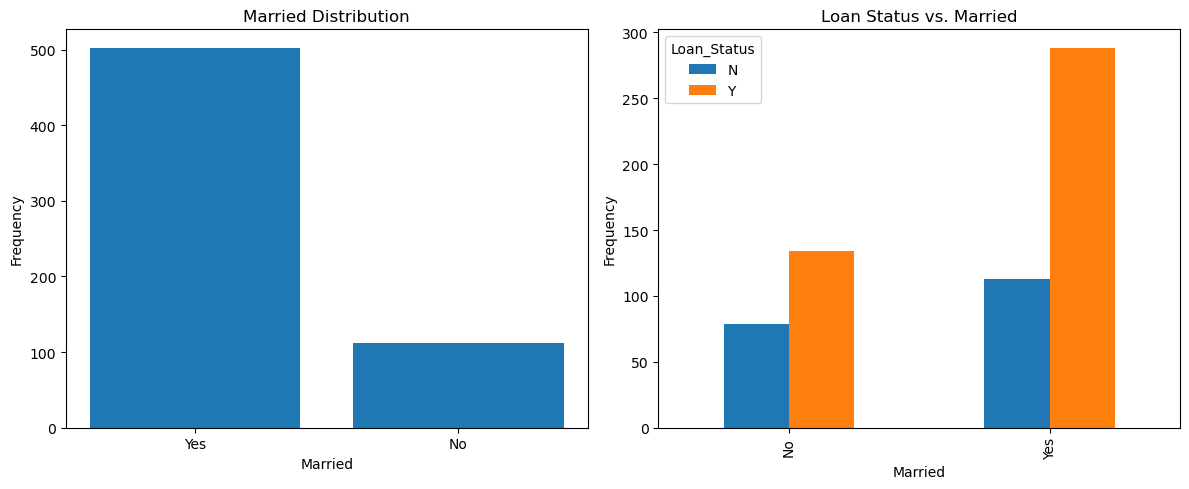

In [13]:
# Loan status vs. Married
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].bar(df['Married'].value_counts().index, df['Gender'].value_counts().values)
axs[0].set_title("Married Distribution")
axs[0].set_xlabel("Married")
axs[0].set_ylabel("Frequency")

pd.crosstab(df['Married'], df['Loan_Status']).plot(kind='bar',ax=axs[1])
axs[1].set_title("Loan Status vs. Married")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [14]:
married_approval = pd.crosstab(df['Married'], df['Loan_Status'])
yes_approval_rate = round(married_approval.iloc[1:2,1].values[0]/((married_approval.iloc[1:2,1].values[0]) + (married_approval.iloc[1:2,0].values[0]))*100,2)
print(f"Married loan approval rate = {yes_approval_rate}")
no_approval_rate = round(married_approval.iloc[0:1,1].values[0]/((married_approval.iloc[0:1,1].values[0]) + (married_approval.iloc[0:1,0].values[0]))*100,2)
print(f"Not married loan approval rate = {no_approval_rate}")

Married loan approval rate = 71.82
Not married loan approval rate = 62.91


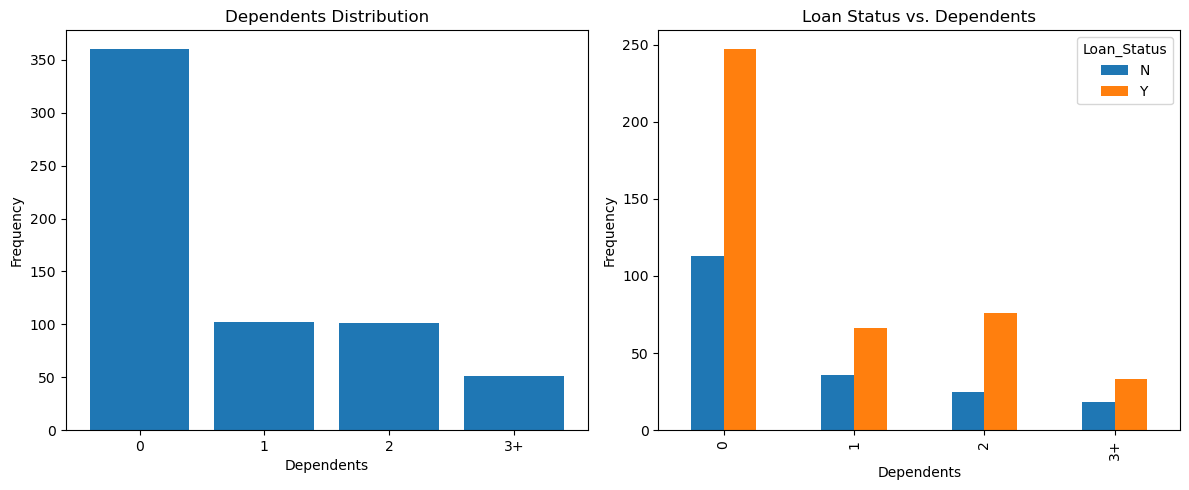

In [15]:
# Loan status vs. Dependents
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].bar(df['Dependents'].value_counts().index, df['Dependents'].value_counts().values)
axs[0].set_title("Dependents Distribution")
axs[0].set_xlabel("Dependents")
axs[0].set_ylabel("Frequency")

pd.crosstab(df['Dependents'], df['Loan_Status']).plot(kind='bar',ax=axs[1])
axs[1].set_title("Loan Status vs. Dependents")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [16]:
dependents_approval = pd.crosstab(df['Dependents'], df['Loan_Status'])
dependents = round(dependents_approval['Y'] / (dependents_approval['Y'] + dependents_approval['N']) * 100,2)
dependents.head()

Dependents
0     68.61
1     64.71
2     75.25
3+    64.71
dtype: float64

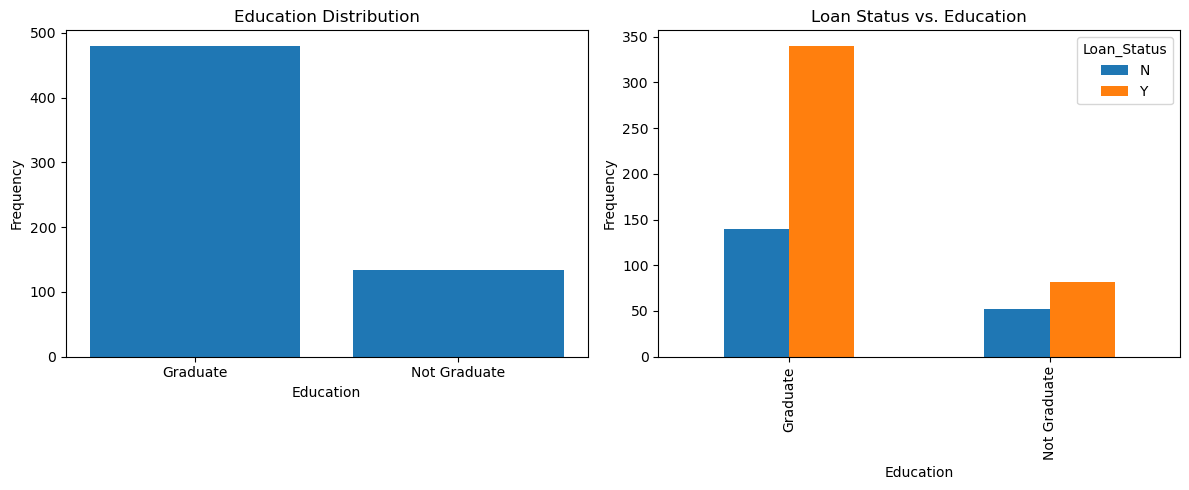

In [17]:
# Loan status vs. Education
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].bar(df['Education'].value_counts().index, df['Education'].value_counts().values)
axs[0].set_title("Education Distribution")
axs[0].set_xlabel("Education")
axs[0].set_ylabel("Frequency")

pd.crosstab(df['Education'], df['Loan_Status']).plot(kind='bar',ax=axs[1])
axs[1].set_title("Loan Status vs. Education")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [22]:
df['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

## Data preparation for modelling

In [19]:
# handling categorical data
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
df['Married'] = df['Married'].apply(lambda x: 1 if x=='Yes' else 0)
df['Education'] = df['Education'].apply(lambda x: 1 if x == 'Graduate' else 0)
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str)
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x=='Y' else 0)

encoded_ohe_df = pd.get_dummies(df[['Dependents', 'Loan_Amount_Term','Property_Area']], dtype=int)
df.drop(columns=['Dependents', 'Loan_Amount_Term','Property_Area'], inplace=True)
df = df.merge(encoded_ohe_df, left_index=True, right_index=True)

In [73]:
encoded_ohe_df

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_12.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
610,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
611,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
612,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [21]:
# rearrange columns
df = df[['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_120.0',
       'Loan_Amount_Term_180.0', 'Loan_Amount_Term_240.0',
       'Loan_Amount_Term_300.0', 'Loan_Amount_Term_36.0',
       'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
       'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban','Loan_Status']]

## Modelling

In [23]:
# splitting x, y
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
y = df['Loan_Status']

In [24]:
y.unique()

array([1, 0], dtype=int64)

In [25]:
# scale data
scaler = StandardScaler()
scaler.fit(X)

with open('scaler.pkl','wb') as fid:
    pickle.dump(scaler, fid)

scaled_X = scaler.transform(X)

In [27]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size= 0.2, random_state=42)

In [49]:
model_lr = LogisticRegression()
model_svm = svm.SVC(probability=True)
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [50]:
model_lr.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
with open('logisticRegressionModel.pkl','wb') as fid:
    pickle.dump(model_lr, fid)

with open('SVMModel.pkl','wb') as fid:
    pickle.dump(model_svm, fid)

with open('decisionTreeModel.pkl','wb') as fid:
    pickle.dump(model_dt, fid)

with open('randomForestModel.pkl','wb') as fid:
    pickle.dump(model_rf, fid)



## Model Evaluation

In [52]:
print(f"logistic regression model score = {model_lr.score(X_test, y_test)}")
print(f"Support vector machine model score = {model_svm.score(X_test, y_test)}")
print(f"Decision tree classifier model score = {model_dt.score(X_test, y_test)}")
print(f"Random forest classifier model score = {model_rf.score(X_test, y_test)}")


logistic regression model score = 0.7804878048780488
Support vector machine model score = 0.7723577235772358
Decision tree classifier model score = 0.6585365853658537
Random forest classifier model score = 0.7804878048780488


In [53]:
y_pred_lr = model_lr.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

In [54]:
print("="*20 + "linear regression classification report" + "="*20)
print(classification_report(y_test, y_pred_lr))
print("="*20 + "Support vector machine classification report" + "="*20)
print(classification_report(y_test, y_pred_svm))
print("="*20 + "Decision tree classification report" + "="*20)
print(classification_report(y_test, y_pred_dt))
print("="*20 + "Random forest classification report" + "="*20)
print(classification_report(y_test, y_pred_rf))

====================linear regression classification report====================
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123

====================Support vector machine classification report====================
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

====================Decision tree classification report====================
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       

In [55]:
print("="*20 + "linear regression accuracy_score" + "="*20)
print(accuracy_score(y_test, y_pred_lr))
print("="*20 + "Support vector machine accuracy_score" + "="*20)
print(accuracy_score(y_test, y_pred_svm))
print("="*20 + "Decision tree accuracy_score" + "="*20)
print(accuracy_score(y_test, y_pred_dt))
print("="*20 + "Random forest accuracy_score" + "="*20)
print(accuracy_score(y_test, y_pred_rf))

====================linear regression accuracy_score====================
0.7804878048780488
====================Support vector machine accuracy_score====================
0.7723577235772358
====================Decision tree accuracy_score====================
0.6585365853658537
====================Random forest accuracy_score====================
0.7804878048780488


In [56]:
print("="*20 + "linear regression f1 score" + "="*20)
print(f1_score(y_test, y_pred_lr))
print("="*20 + "Support vector machine f1 score" + "="*20)
print(f1_score(y_test, y_pred_svm))
print("="*20 + "Decision tree f1 score" + "="*20)
print(f1_score(y_test, y_pred_dt))
print("="*20 + "Random forest f1 score" + "="*20)
print(f1_score(y_test, y_pred_rf))

====================linear regression f1 score====================
0.8524590163934426
====================Support vector machine f1 score====================
0.8461538461538461
====================Decision tree f1 score====================
0.7375
====================Random forest f1 score====================
0.8524590163934426


In [57]:
print("="*20 + "linear regression precision score" + "="*20)
print(precision_score(y_test, y_pred_lr))
print("="*20 + "Support vector machine precision score" + "="*20)
print(precision_score(y_test, y_pred_svm))
print("="*20 + "Decision tree precision score" + "="*20)
print(precision_score(y_test, y_pred_dt))
print("="*20 + "Random forest precision score" + "="*20)
print(precision_score(y_test, y_pred_rf))

====================linear regression precision score====================
0.7572815533980582
====================Support vector machine precision score====================
0.7549019607843137
====================Decision tree precision score====================
0.7375
====================Random forest precision score====================
0.7572815533980582


In [58]:
print("="*20 + "linear regression recall score" + "="*20)
print(recall_score(y_test, y_pred_lr))
print("="*20 + "Support vector machine recall score" + "="*20)
print(recall_score(y_test, y_pred_svm))
print("="*20 + "Decision tree recall score" + "="*20)
print(recall_score(y_test, y_pred_dt))
print("="*20 + "Random forest recall score" + "="*20)
print(recall_score(y_test, y_pred_rf))

====================linear regression recall score====================
0.975
====================Support vector machine recall score====================
0.9625
====================Decision tree recall score====================
0.7375
====================Random forest recall score====================
0.975


In [59]:
# Confusion matrix heatmap function
def conf_matrix_heatmap(title,actual,predict):
    print(f"--- {title} Confusion Matrix ---")
    
    cm = confusion_matrix(actual,predict)
    
    seaborn.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return

--- logistic Regression Confusion Matrix ---


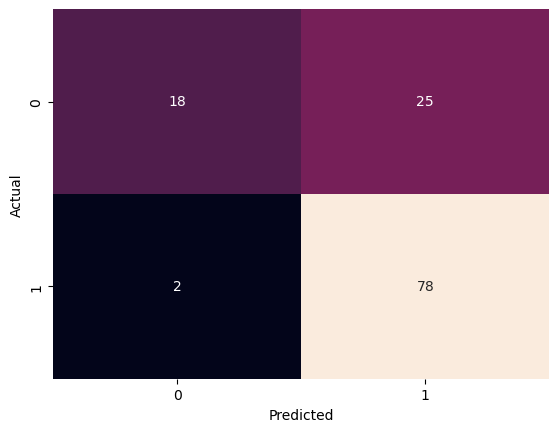

--- Support Vector Machine Confusion Matrix ---


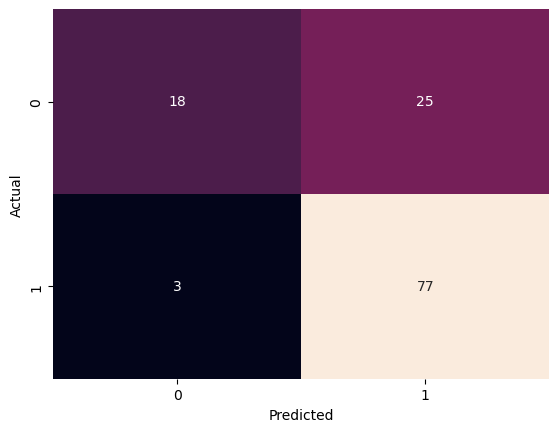

--- Decision Tree Confusion Matrix ---


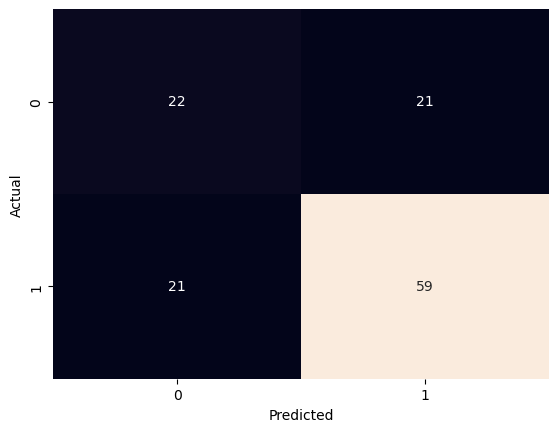

--- Random Forest Confusion Matrix ---


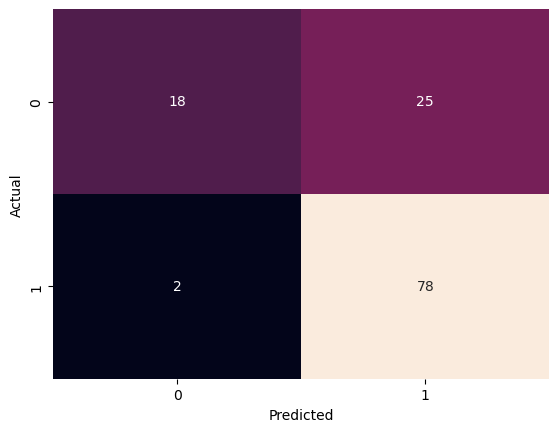

In [60]:
conf_matrix_heatmap("logistic Regression", y_test, y_pred_lr)
conf_matrix_heatmap("Support Vector Machine", y_test, y_pred_svm)
conf_matrix_heatmap("Decision Tree", y_test, y_pred_dt)
conf_matrix_heatmap("Random Forest", y_test, y_pred_rf)

# print("="*20 + "linear regression confusion matrix" + "="*20)
# print(confusion_matrix(y_test, y_pred_lr))
# print("="*20 + "Support vector machine confusion matrix" + "="*20)
# print(confusion_matrix(y_test, y_pred_svm))
# print("="*20 + "Decision tree confusion matrix" + "="*20)
# print(confusion_matrix(y_test, y_pred_dt))
# print("="*20 + "Random forest confusion matrix" + "="*20)
# print(confusion_matrix(y_test, y_pred_rf))

In [61]:
# roc auc curve function
def model_roc_auc(y_test, y_test_score, title):
    ns_probs = [0 for _ in range(len(y_test))]
    y_score_roc = y_test_score[:,1]
    
    ns_auc = roc_auc_score(y_test, ns_probs)
    rf_auc = roc_auc_score(y_test, y_score_roc)
    
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    rf_fpr, rf_tpr, _ = roc_curve(y_test, y_score_roc)
    
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label="No Skill")
    plt.plot(rf_fpr, rf_tpr, marker='.', label=title)
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    return

In [62]:
y_pred_score_lr = model_lr.predict_proba(X_test)
y_pred_score_svm = model_svm.predict_proba(X_test)
y_pred_score_dt = model_dt.predict_proba(X_test)
y_pred_score_rf = model_rf.predict_proba(X_test)


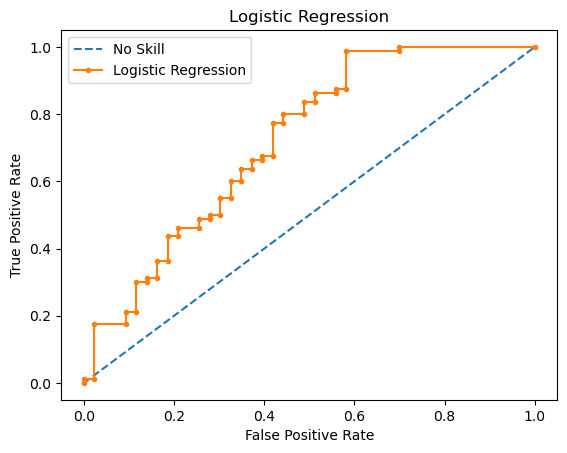

In [64]:
model_roc_auc(y_test, y_pred_score_lr, "Logistic Regression")

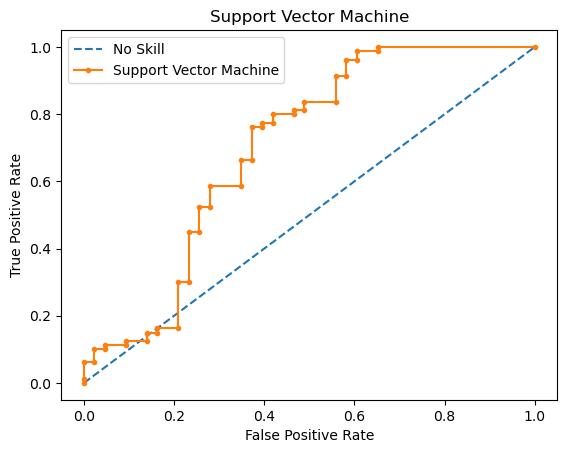

In [65]:
model_roc_auc(y_test, y_pred_score_svm, "Support Vector Machine")

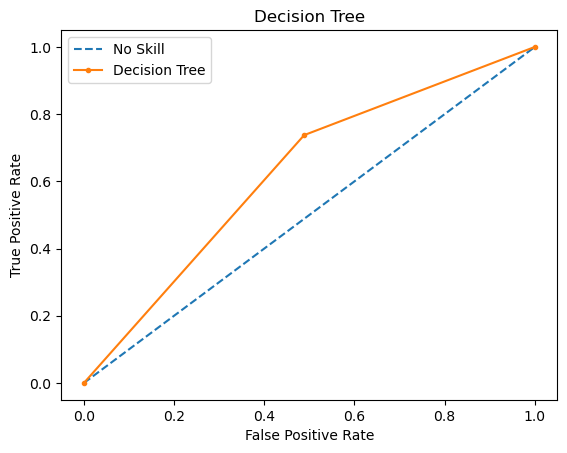

In [66]:
model_roc_auc(y_test, y_pred_score_dt, "Decision Tree")

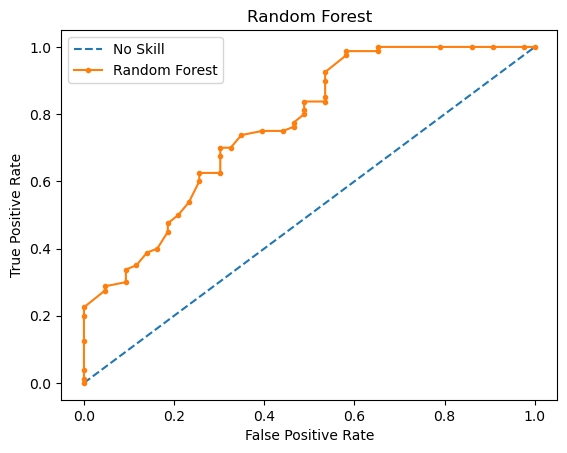

In [67]:
model_roc_auc(y_test, y_pred_score_rf, "Random Forest")

In [68]:
def model_traintest_rocauc(model, X_train, X_test, y_train, y_test, title):
    y_train_score1 = model.predict_proba(X_train)[:,1]
    y_test_score1 = model.predict_proba(X_test)[:,1]
    
    train_auc = roc_auc_score(y_train, y_train_score1)
    test_auc = roc_auc_score(y_test, y_test_score1)
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_score1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_score1)
    
    plt.plot(fpr_train, tpr_train, label="Train (AUC = {:.3f})".format(train_auc))
    plt.plot(fpr_test, tpr_test, label="Test (AUC = {:.3f})".format(test_auc))
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    
    return

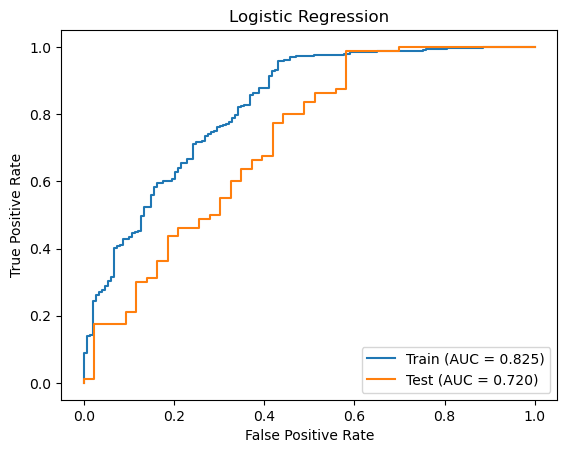

In [69]:
model_traintest_rocauc(model_lr, X_train, X_test, y_train, y_test, "Logistic Regression")

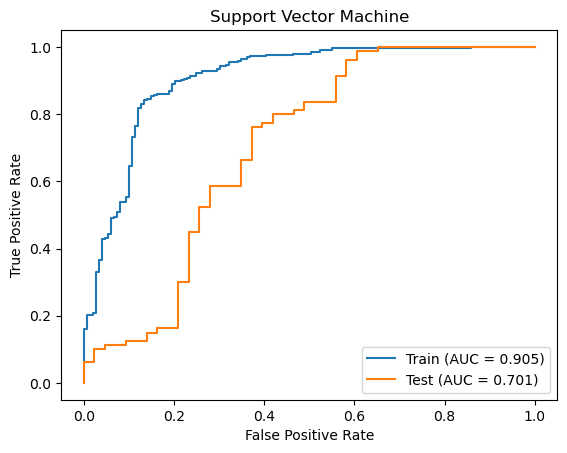

In [70]:
model_traintest_rocauc(model_svm, X_train, X_test, y_train, y_test, "Support Vector Machine")

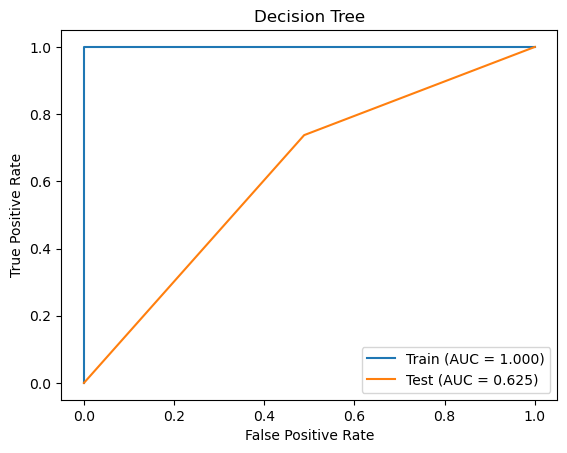

In [71]:
model_traintest_rocauc(model_dt, X_train, X_test, y_train, y_test, "Decision Tree")

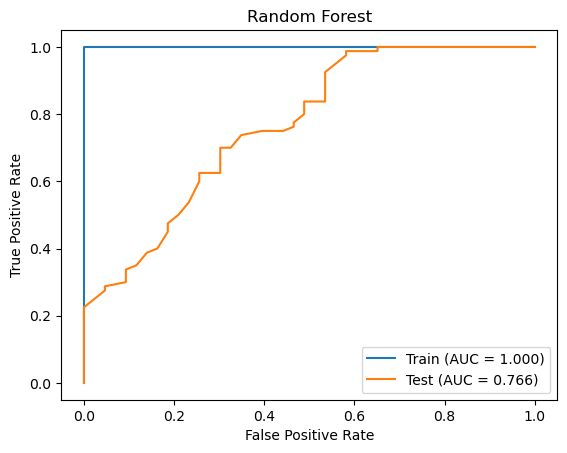

In [72]:
model_traintest_rocauc(model_rf, X_train, X_test, y_train, y_test, "Random Forest")

In [77]:
y_pred_score_lr[:5]

array([[0.09101305, 0.90898695],
       [0.07834704, 0.92165296],
       [0.15593486, 0.84406514],
       [0.25245186, 0.74754814],
       [0.11943936, 0.88056064]])

In [80]:
list = []
for i in y_pred_score_lr:
    list.append(i[1])

In [81]:
list

[0.9089869466622501,
 0.9216529582808427,
 0.8440651401494701,
 0.7475481446480402,
 0.8805606431294299,
 0.7054454716489303,
 0.9469810821282699,
 0.8645914073565899,
 0.8000664774349882,
 0.7662597155754601,
 0.2839591337296679,
 0.7793553081669258,
 0.6361851137847486,
 0.8011579550532085,
 0.8825454006852401,
 0.7622058702572565,
 0.7728151350693038,
 0.8394361088657915,
 0.8704751098678077,
 0.91897604846408,
 0.8363842288570335,
 0.9250360059574259,
 0.5964912753958026,
 0.8702154336119847,
 0.6985629218139284,
 0.6278325272671106,
 0.6229746524810746,
 0.8723846616931257,
 0.7665028528563373,
 0.8645370494372668,
 0.8925862381511025,
 0.9170312650030531,
 0.8886164385522249,
 0.7297038551297864,
 0.6755429107876295,
 0.05225574124377342,
 0.8141777237900043,
 0.8912385756574831,
 0.9453601928243651,
 0.8905152707999806,
 0.7510671149679324,
 0.6828170699789057,
 0.7227233828802941,
 0.7902236081621885,
 0.7495431413937398,
 0.9274056905712215,
 0.7188039325482654,
 0.09470184595